In [1]:
import os

# change working directory, run this cell once
os.chdir("../")

In this notebook, we will demonstrate an example on how to use the ``AutoCluster`` class for clustering.

### Import packages

In [10]:
# we will be using sample datasets in sklearn
from sklearn import datasets
from collections import Counter
import pandas as pd

# autocluster functionalities
from autocluster import AutoCluster
from evaluators import get_evaluator
from utils.metafeatures import MetafeatureMapper

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load sklearn digits dataset

In [3]:
digits_df = pd.DataFrame(datasets.load_digits()['data'])
digits_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


- Note that we are converting the dataset from ``numpy`` format to ``pandas DataFrame`` format. 
- This is because the ``AutoCluster.fit()`` function only accepts ``DataFrame`` format as input.
- There are 64 columns in this dataset, named ``0``, ``1``, ``2`` ... and so on. 

In [4]:
print("Shape of this dataframe is {}".format(digits_df.shape))

Shape of this dataframe is (1797, 64)


### Finding an optimal clustering model using Bayesian Optimization (SMAC)

In [7]:
cluster = AutoCluster()
fit_params = {
    "df": digits_df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'MiniBatchKMeans'
    ], 
    "dim_reduction_alg_ls": [
        'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD', 'NullModel'
    ],
    "optimizer": 'smac',
    "n_evaluations": 50,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 50,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .05, 
                               min_relative_proportion='default'),
    "n_folds": 4,
    "warmstart": False
}
result_dict = cluster.fit(**fit_params)

1419/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {KMeans, GaussianMixture, MiniBatchKMeans}, Default: KMeans
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {PCA, IncrementalPCA, KernelPCA, FastICA, TruncatedSVD, NullModel}, Default: PCA
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: logcosh
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Defaul

Fitting configuration: 
{'n_components___FastICA': 3, 'fun___FastICA': 'logcosh', 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 39, 'algorithm___FastICA': 'deflation', 'covariance_type___GaussianMixture': 'diag', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 54, 'covariance_type___GaussianMixture': 'diag', 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'NullModel'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'whiten___FastICA': True, 'fun___FastICA': 'exp', 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 27, 'algorithm___FastICA': 'deflation', 'covariance_type___GaussianMixture': 'full', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'KernelPCA', 'kernel___KernelPCA': 'poly', 'n_clusters___KMeans': 41, 'n_components___KernelPCA': 7}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___PCA': 2, 'batch_size___MiniBatchKMeans': 709, 'n_clusters___MiniBatchKMeans': 16, 'svd_solver___PCA': 'full', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___PCA': 3, 'batch_size___MiniBatchKMeans': 351, 'n_clusters___MiniBatchKMeans': 49, 'svd_solver___PCA': 'arpack', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'kernel___KernelPCA': 'poly', 'batch_size___MiniBatchKMeans': 349, 'n_clusters___MiniBatchKMeans': 74, 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4}
Score obtained by this configuration: inf


Fitting configuration: 
{'covariance_type___GaussianMixture': 'tied', 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 67, 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 5}
Score obtained by this configuration: inf


Fitting configuration: 
{'covariance_type___GaussianMixture': 'diag', 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 29, 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 4}
Score obtained by this configuration: inf


Fitting configuration: 
{'covariance_type___GaussianMixture': 'full', 'n_components___PCA': 3, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 57, 'clustering_choice': 'GaussianMixture', 'svd_solver___PCA': 'auto', 'whiten___PCA': True, 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 24, 'n_components___PCA': 3, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___PCA': 3, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 46, 'clustering_choice': 'GaussianMixture', 'svd_solver___PCA': 'arpack', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 308, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 65, 'covariance_type___GaussianMixture': 'tied', 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___PCA': 2, 'init_params___GaussianMixture': 'random', 'n_components___GaussianMixture': 73, 'clustering_choice': 'GaussianMixture', 'svd_solver___PCA': 'arpack', 'covariance_type___GaussianMixture': 'tied', 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 79, 'n_components___PCA': 3, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'auto', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 11, 'dim_reduction_choice': 'NullModel', 'batch_size___MiniBatchKMeans': 176}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___IncrementalPCA': 2, 'batch_size___IncrementalPCA': 645, 'batch_size___MiniBatchKMeans': 672, 'n_clusters___MiniBatchKMeans': 37, 'whiten___IncrementalPCA': True, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___PCA': 3, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 78, 'clustering_choice': 'GaussianMixture', 'svd_solver___PCA': 'auto', 'covariance_type___GaussianMixture': 'tied', 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 45, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'auto', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'whiten___FastICA': True, 'fun___FastICA': 'logcosh', 'n_clusters___KMeans': 8, 'clustering_choice': 'KMeans', 'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: 0.31488339798101345
Fitting configuration: 
{'clustering_choice': 'KMeans', 'n_clusters___KMeans': 26, 'dim_reduction_choice': 'NullModel'}
Score obtained by this configuration: inf


Fitting configuration: 
{'covariance_type___GaussianMixture': 'full', 'n_components___PCA': 2, 'init_params___GaussianMixture': 'kmeans', 'n_components___GaussianMixture': 14, 'clustering_choice': 'GaussianMixture', 'svd_solver___PCA': 'arpack', 'whiten___PCA': True, 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'whiten___FastICA': True, 'fun___FastICA': 'logcosh', 'n_clusters___KMeans': 28, 'clustering_choice': 'KMeans', 'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'KernelPCA', 'kernel___KernelPCA': 'poly', 'n_clusters___KMeans': 11, 'n_components___KernelPCA': 9}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'fun___FastICA': 'exp', 'n_clusters___KMeans': 54, 'clustering_choice': 'KMeans', 'algorithm___FastICA': 'parallel', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'dim_reduction_choice': 'TruncatedSVD', 'n_clusters___KMeans': 37, 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 71, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'auto', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 77, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 12, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'auto', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'fun___FastICA': 'logcosh', 'n_clusters___KMeans': 9, 'clustering_choice': 'KMeans', 'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___FastICA': 3, 'fun___FastICA': 'exp', 'n_clusters___KMeans': 11, 'clustering_choice': 'KMeans', 'algorithm___FastICA': 'deflation', 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'svd_solver___PCA': 'arpack', 'n_components___PCA': 3, 'n_clusters___KMeans': 5, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.3319403552025054
Fitting configuration: 
{'n_components___FastICA': 3, 'whiten___FastICA': True, 'fun___FastICA': 'logcosh', 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 1, 'algorithm___FastICA': 'parallel', 'covariance_type___GaussianMixture': 'tied', 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'FastICA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 514, 'init_params___GaussianMixture': 'random', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 31, 'covariance_type___GaussianMixture': 'spherical', 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'n_components___PCA': 3, 'n_clusters___KMeans': 5, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.33436661104362164
Fitting configuration: 
{'covariance_type___GaussianMixture': 'diag', 'init_params___GaussianMixture': 'kmeans', 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 26, 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'arpack', 'n_components___TruncatedSVD': 4}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 609, 'n_clusters___MiniBatchKMeans': 1, 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 7}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 8, 'n_components___PCA': 3, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.31476766377412746
Fitting configuration: 
{'n_clusters___KMeans': 7, 'n_components___PCA': 3, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'arpack', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.31462246889738205
Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'batch_size___MiniBatchKMeans': 635, 'n_clusters___MiniBatchKMeans': 8, 'dim_reduction_choice': 'TruncatedSVD', 'algorithm___TruncatedSVD': 'randomized', 'n_components___TruncatedSVD': 3}
Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'MiniBatchKMeans', 'n_components___IncrementalPCA': 2, 'batch_size___IncrementalPCA': 22, 'batch_size___MiniBatchKMeans': 916, 'n_clusters___MiniBatchKMeans': 38, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 8, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.301662285242863
Fitting configuration: 
{'n_clusters___KMeans': 1, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 9, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'randomized', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.3023571497067986
Fitting configuration: 
{'clustering_choice': 'KMeans', 'svd_solver___PCA': 'full', 'n_components___PCA': 2, 'n_clusters___KMeans': 65, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: inf


Fitting configuration: 
{'n_clusters___KMeans': 7, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'arpack', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.2911597541560863
Fitting configuration: 
{'n_clusters___KMeans': 6, 'n_components___PCA': 2, 'clustering_choice': 'KMeans', 'svd_solver___PCA': 'arpack', 'whiten___PCA': True, 'dim_reduction_choice': 'PCA'}
Score obtained by this configuration: 0.291837913884426
Fitting configuration: 
{'n_components___IncrementalPCA': 3, 'batch_size___IncrementalPCA': 189, 'init_params___GaussianMixture': 'random', 'whiten___IncrementalPCA': True, 'clustering_choice': 'GaussianMixture', 'n_components___GaussianMixture': 61, 'covariance_type___GaussianMixture': 'diag', 'warm_start___GaussianMixture': True, 'dim_reduction_choice': 'IncrementalPCA'}
Score obtained by this configuration: inf


Optimization is complete.
Took 109.43 seconds.
The optimal configuration is 
Configuration:
  clustering_choice, Value: 'KMeans'
  dim_reduction_choice, Value: 'PCA'
  n_clusters___KMeans, Value: 5
  n_components___PCA, Value: 2
  svd_solver___PCA, Value: 'auto'
  whiten___PCA, Value: False



There is a lot going on here, let's talk about some of the parameters used in the example above:
- ``cluster_alg_ls``: This is the list of possible clustering algorithms to include within the search space.
- ``dim_reduction_alg_ls``: This is the list of possible dimension reduction algorithms to include within the search space. Dimension reduction is performed **before** the clustering step. 
- ``optimizer``: There are two options for this, ``"smac"`` or ``"random"``. ``"smac"`` does Bayesian Optimization using the SMAC library, while ``"random"`` just performs random search optimization.
- ``n_evaluations``: number of iterations to run, generally the larger the better.
- ``cutoff_time``: If evaluating a certain configuration takes longer than this value (in seconds), it will be terminated.
- ``preprocess_dict``: This is important, ``AutoCluster.fit()`` uses this dictionary to preprocess the dataset. For instance, categorical columns will be one hot encoded, while ordinal columns will encoded as integers. 
- ``evaluator``: This is important, it tells ``AutoCluster.fit()`` how to evaluate a clustering result. 
    - ``evaluator_ls``: list of metric to include in a linear combination. Choices available are ``["silhouetteScore", "daviesBouldinScore", "calinskiHarabaszScore"]``.
    - ``weights``: how much weights to use for each metric in the linear combination.
    - ``clustering_num``: A tuple is expected. If clustering result has n_clusters outside this specified range, ``float(inf)`` will be returned from evaluator.
    - ``min_proportion``: The proportion of points in each cluster must be at least this value.
    - ``min_relative_proportion``: The ratio of number points in the smallest cluster to the number of points in the largest cluster must be at least this value. By using ``'default'``, ``min_relative_proportion`` will be set to `` 5 * min_proportion``.
- ``warmstart``: Whether or not to use warmstart, examples will be shown below on how to use this.

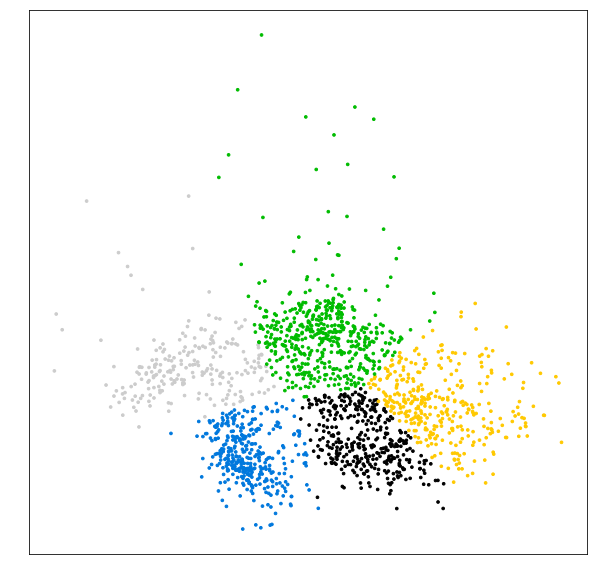

In [9]:
predictions = cluster.predict(digits_df)

In [15]:
print(result_dict["optimal_cfg"])
print(Counter(predictions))

Configuration:
  clustering_choice, Value: 'KMeans'
  dim_reduction_choice, Value: 'PCA'
  n_clusters___KMeans, Value: 5
  n_components___PCA, Value: 2
  svd_solver___PCA, Value: 'auto'
  whiten___PCA, Value: False

Counter({2: 510, 0: 360, 1: 357, 3: 343, 4: 227})
